In [101]:
from imageai.Detection import ObjectDetection
import datetime
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

IMAGES_PATH = "images/"
VIDEOS_PATH = "videos/"
LIB_PATH = "imageai_lib/"

#img = cv2.imread(IMAGES_PATH + "cam_screenshot.jpg")
#img = mpimg.imread(IMAGES_PATH + "cam_screenshot.jpg")
#cv2.imwrite(IMAGES_PATH + 'cam_screenshot_gray.jpg',img)

camera = cv2.VideoCapture(0)
return_value,img = camera.read()
cv2.imwrite(IMAGES_PATH + 'cam_screenshot.jpg',img)

True

In [82]:
execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( os.path.join(execution_path , LIB_PATH + "resnet50_coco_best_v2.0.1.h5"))
#detection_speed="fast"
detector.loadModel()
custom_objects = detector.CustomObjects(bottle=True)

In [102]:
start_time = datetime.datetime.now()
detections = detector.detectCustomObjectsFromImage(input_image=os.path.join(execution_path , IMAGES_PATH + "cam_screenshot.jpg"), output_image_path=os.path.join(execution_path , IMAGES_PATH + "bottle_detection.png"), custom_objects=custom_objects, minimum_percentage_probability=20)
print("Dectection time: " + str(datetime.datetime.now() - start_time))

Dectection time: 0:00:08.437738


In [213]:
import torch
from torch import nn
from torch import Tensor

# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# number of epoch
num_epochs = 25
# batch size to compute mini-batch
batch_size = 1
# number of pixels in the image 
input_size = 2
# number of possible digit: 0 to 9 
num_class = 1
# small step to find a minima
learning_rate = 0.004
# hidden size
hidden_size = 500

# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_class):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU() 
        self.layer2 = nn.Linear(hidden_size, hidden_size) 
        self.layer3 = nn.Linear(hidden_size, hidden_size)  
        self.layer4 = nn.Linear(hidden_size, num_class) 
    
    def forward(self, x):
        outputs = self.layer1(x)
        outputs = self.relu(outputs)
        outputs = self.layer2(outputs)
        outputs = self.relu(outputs)
        outputs = self.layer3(outputs)
        outputs = self.relu(outputs)
        outputs = self.layer4(outputs)
        return outputs
    

In [214]:
# function to train each model
def train_model(model_, my_train_input_, my_train_target_, criterion_, optimizer_,num_epochs_,batch_size_):
    # getting start time of train to get the train time at the end thanks to "end_time"
    start_time = datetime.datetime.now()
    # list to get train errors at each epoch
    train_error = []
    # train function
    for epoch in range(1, num_epochs_+1):
        # using technique of mini batch (size of the batch in the function's parameters)
        for i in range(int(len(my_train_input_)/batch_size_)):  
            # getting images and labels in right format
            x = my_train_input_.narrow(0,i*batch_size_,batch_size_).to(device)
            labels = my_train_target_.narrow(0,i*batch_size_,batch_size_).to(device)

            # Forward pass
            outputs = model_(x)
            loss = criterion_(outputs, labels)

            # Backward and optimize
            optimizer_.zero_grad()
            loss.backward()
            optimizer_.step()
            # getting train error at each epoch
            train_error.append(test_accuracy(model_, my_train_input_, my_train_target_))
        # getting end time and training time
        end_time = datetime.datetime.now()
        training_time = end_time - start_time
        print ('Loss: {:.4f} on epoch: {}, train error: {:.5f}'.format(loss.item(),epoch,train_error[-1]))
    return train_error, training_time

In [215]:
def test_accuracy(model_, my_test_input_, my_test_target_):
    total = my_test_input_.size(0)
    outputs = model_(my_test_input_)
    #print(outputs)
    #print(my_test_target_)
    well_predicted_count = (outputs == my_test_target_).sum().item()

    return 1 - well_predicted_count / total

In [216]:
import numpy
data_x = numpy.matrix([[469,3.21],[294,3.27],[202,3.2],[154,3.28],[119,3.4],[97,3.23],[76, 3.3],[66,3],[59,2.95],[51,3]])
data_y = numpy.matrix([[30],[50],[70],[100],[130],[160],[200],[230],[260],[300]])
input_ = torch.from_numpy(data_x)
target_ = torch.from_numpy(data_y)

print(input_)
print(target_)

tensor([[469.0000,   3.2100],
        [294.0000,   3.2700],
        [202.0000,   3.2000],
        [154.0000,   3.2800],
        [119.0000,   3.4000],
        [ 97.0000,   3.2300],
        [ 76.0000,   3.3000],
        [ 66.0000,   3.0000],
        [ 59.0000,   2.9500],
        [ 51.0000,   3.0000]], dtype=torch.float64)
tensor([[ 30],
        [ 50],
        [ 70],
        [100],
        [130],
        [160],
        [200],
        [230],
        [260],
        [300]], dtype=torch.int32)


In [225]:
model = NeuralNet(input_size, hidden_size, num_class).to(device)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.00001)  
train_error, training_time = train_model(model, input_.float(), target_.float(), criterion, optimizer,num_epochs,batch_size)


Loss: 295.9788 on epoch: 1, train error: 1.00000
Loss: 294.8932 on epoch: 2, train error: 1.00000
Loss: 293.8047 on epoch: 3, train error: 1.00000
Loss: 292.6976 on epoch: 4, train error: 1.00000
Loss: 291.5566 on epoch: 5, train error: 1.00000
Loss: 290.3900 on epoch: 6, train error: 1.00000
Loss: 290.2760 on epoch: 7, train error: 1.00000
Loss: 290.1633 on epoch: 8, train error: 1.00000
Loss: 290.0606 on epoch: 9, train error: 1.00000
Loss: 289.9558 on epoch: 10, train error: 1.00000
Loss: 289.8486 on epoch: 11, train error: 1.00000
Loss: 289.7502 on epoch: 12, train error: 1.00000
Loss: 289.6466 on epoch: 13, train error: 1.00000
Loss: 289.5403 on epoch: 14, train error: 1.00000
Loss: 289.4373 on epoch: 15, train error: 1.00000
Loss: 289.3351 on epoch: 16, train error: 1.00000
Loss: 289.2292 on epoch: 17, train error: 1.00000
Loss: 289.1259 on epoch: 18, train error: 1.00000
Loss: 289.0240 on epoch: 19, train error: 1.00000
Loss: 288.9221 on epoch: 20, train error: 1.00000
Loss: 288

In [226]:
model(Tensor([51,3]))

tensor([11.6807], grad_fn=<AddBackward0>)

In [210]:
def calcul_distance(height, ratio_height_width):
        
    return distance

In [104]:
i = 0
print("Number of object: " + str(len(detections)))

for eachObject in detections:
    i=i+1
    #print(eachObject["name"] + " : " + str(eachObject["percentage_probability"]) + " : " + str(eachObject["box_points"]) )
    center = [(eachObject["box_points"][0] + eachObject["box_points"][2]) / 2, (eachObject["box_points"][1] + eachObject["box_points"][3]) / 2]
    height = max(abs(eachObject["box_points"][0]-eachObject["box_points"][2]),abs(eachObject["box_points"][1]-eachObject["box_points"][3]))
    width = min(abs(eachObject["box_points"][0]-eachObject["box_points"][2]),abs(eachObject["box_points"][1]-eachObject["box_points"][3]))
    ratio_height_width = height/width
    print("\n - Object {}: {:>40}".format(i,"Bottle center (x,y): " + str(center)))
    print('{:>36}'.format("Bottle height: " + str(height)))    
    print('{:>55}'.format("Ratio height/width: " + str(ratio_height_width))) 
    print('{:>30}'.format("Distance: " + str(calcul_distance(height, ratio_height_width)))) 



Number of object: 1

 - Object 1:      Bottle center (x,y): [272.5, 349.5]
                   Bottle height: 51
                                Ratio height/width: 3.0
                Distance: 34.0


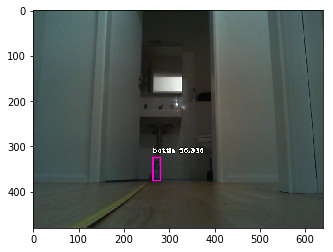

In [105]:
img=mpimg.imread(IMAGES_PATH + 'bottle_detection.png')
imgplot = plt.imshow(img)
plt.show()